In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("Dataset.csv")

In [25]:
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [26]:
df.tail()

,observation_date,DEXINUS
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  12649 non-null  object 
 1   DEXINUS           12155 non-null  float64
dtypes: float64(1), object(1)
memory usage: 197.8+ KB


In [28]:
df.describe()

,DEXINUS
count,12155.000000
mean,34.206133
std,21.089190
min,7.190000
25%,12.075000
50%,35.890000
75%,47.650000
max,76.950000


In [29]:
df.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

In [30]:
df.fillna(method="ffill",inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  12649 non-null  object 
 1   DEXINUS           12649 non-null  float64
dtypes: float64(1), object(1)
memory usage: 197.8+ KB


In [32]:
df.columns=["date","DEXINUS"]
df.head()

,date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [33]:
df.iloc[11:31]

,date,DEXINUS
11,1973-01-17,8.01
12,1973-01-18,8.01
13,1973-01-19,8.00
14,1973-01-22,8.00
15,1973-01-23,8.00
16,1973-01-24,8.00
17,1973-01-25,8.00
18,1973-01-26,8.00
19,1973-01-29,8.01
20,1973-01-30,8.00


In [34]:
df["date"]=pd.to_datetime(df["date"])

In [35]:
df.set_index('date', inplace=True)

In [36]:
df.head()

,DEXINUS
date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00


<AxesSubplot:xlabel='date', ylabel='DEXINUS'>

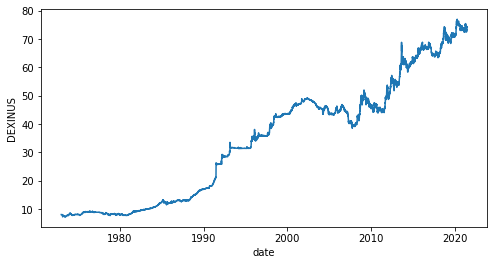

In [37]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df['DEXINUS'] )

In [38]:
import plotly.express as px

fig = px.line(df, x = 'date', y='DEXINUS', title ='India-US exchange rate' )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=15, label="15y", step="year", stepmode="backward"),
            dict(step="all"),
        ])
    )
)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['DEXINUS'] but received: date

#### Testing Stationarity

In [17]:
series=df.iloc[12387:12649]
series

,DEXINUS
date,
2020-06-25,75.58
2020-06-26,75.63
2020-06-29,75.52
2020-06-30,75.53
2020-07-01,75.50
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


In [18]:
from statsmodels.tsa.stattools import adfuller

#### Null Hypothesis H0 = If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary
#### Alternative Hypothesis H1 = The null hypothesis is rejected and suggests the time series does not have a unit root, meaning it is stationary

In [19]:
test_result=adfuller(series['DEXINUS'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(DEXINUS):
    result=adfuller(DEXINUS)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
adfuller_test(series['DEXINUS'])

ADF Test Statistic : -2.8771228901862984
p-value : 0.04807370335640582
#Lags Used : 0
Number of Observations Used : 261
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
